
# 2022 유망 업종 데이터 수집

### Keyword

* html 파일 읽어오기
    * pd.read_html(url, encoding="cp949")

* 결측 데이터 제거하기(axis 0:행, 1:열)
    * table[0].dropna()

* 데이터 프레임 합치기
    * pd.concat([df1, df2, df3])

* 중복데이터 제거
    * df.drop_duplicates()


* 날짜 column의 첫 row값 확인
    * date = df.iloc[0]["날짜"]

* 파일로 저장하기 
    * df.to_csv(file_name, index=False)

* 파일 읽어오기
    * pd.read_csv(file_name)

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot , numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/content/drive/MyDrive/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)


##### 한글 적용

In [4]:
def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [5]:
font_family = get_font_family()

In [6]:
# 그래프 스타일,폰트,마이너스폰트 설정
plt.style.use("seaborn")
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

##### 모든 업종코드 수집  
    - BeautifulSoup사용하여 웹크롤링
    - dictionary  업종명 : 업종코드 형태로 수집

In [7]:
# -*- coding:utf-8 -*-
import re
import time
import ssl
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
context = ssl._create_unverified_context()
#page = requests.get("https://finance.naver.com/sise/sise_group.naver?type=upjong",context=context)
result = urlopen("https://finance.naver.com/sise/sise_group.naver?type=upjong", context=context)
soup = bs(result.read(), "html.parser")

code_num=[]
code_name=[]
try :
    for td in soup('td'):  # td 안의
        for a in td('a'):  # a 태그 중에서
            name = a.get_text()  # 업종명 데이터 추출
            #print(name)
            time.sleep(0.2)
            cod = re.search('/sise/.*', a['href']).group(0)  # 필요부분추출후 그룹핑
            # 업종 url
            cod = str(cod)
            cod = re.sub(r'[^0-9]', '', cod)
            #
            #print(p)
            code_num.append(cod)
            code_name.append(name)
except:
    pass
#딕셔너리로 변환
dic = dict(zip(code_name, code_num))            
print(dic)

{'다각화된소비자서비스': '339', '전기유틸리티': '325', '상업서비스와공급품': '324', '기타금융': '319', '인터넷과카탈로그소매': '308', '담배': '275', '판매업체': '265', '종이와목재': '318', '사무용전자제품': '338', '음료': '309', '손해보험': '315', '반도체와반도체장비': '278', '카드': '337', '광고': '310', '운송인프라': '296', '자동차': '273', '복합유틸리티': '331', '증권': '321', '석유와가스': '313', '호텔,레스토랑,레저': '317', '은행': '301', '기타': '25', '전자제품': '307', '백화점과일반상점': '264', '컴퓨터와주변기기': '293', '식품': '268', '다각화된통신서비스': '336', '제약': '261', '가스유틸리티': '312', '자동차부품': '270', '건강관리업체및서비스': '316', '가정용기기와용품': '298', '포장재': '311', '부동산': '280', '교육서비스': '290', '섬유,의류,신발,호화품': '274', '방송과엔터테인먼트': '285', '복합기업': '276', '전자장비와기기': '282', '전문소매': '328', '양방향미디어와서비스': '300', '화학': '272', '도로와철도운송': '329', '가구': '303', '무선통신서비스': '333', '생명보험': '330', '디스플레이패널': '327', '철강': '304', '우주항공과국방': '284', '무역회사와판매업체': '334', '화장품': '266', '창업투자': '277', '통신장비': '294', '건설': '279', '생물공학': '286', '건축자재': '289', '생명과학도구및서비스': '262', '핸드셋': '292', '식품과기본식료품소매': '302', '소프트웨어': '287', '항공사': '305', 

#### 주요증권사가 뽑은 2022년 유망업종 수집

   - 반도체와반도체장비 / 자동차 / 자동차부품/ 방송과엔터테인먼트
   - 관련기사 : https://pbes.tistory.com/entry/%EC%A3%BC%EC%9A%94-%EC%A6%9D%EA%B6%8C%EC%82%AC%EA%B0%80-%EB%BD%91%EC%9D%80-2022%EB%85%84-%EC%9C%A0%EB%A7%9D-%EC%97%85%EC%A2%85-%EB%B0%8F-%EC%A2%85%EB%AA%A9%20import%20time

##### read_html을 통해 url에 해당하는 업종 데이터 수집

In [8]:
import time
#딕셔너리 key값 이용하여 value값 담기
data_frame=[dic['반도체와반도체장비'],dic['자동차'],dic['방송과엔터테인먼트']]

#테이블 데이터 담아줄 리스트 생성
table=[]
for i in data_frame:
    url = "https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=" + str(i)
    print(url)
    time.sleep(0.3)
    
    # read_html을 통해 해당 업종을수집합니다.
    table1 = pd.read_html(url, encoding="cp949")
    table.append(table1)
    
#print(table)
print("수집완료")

https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=278
https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=273
https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=285
수집완료


##### 수집데이터 형태 확인
   - 2차원 리스트

In [9]:
np.shape(table)

(3, 3)

##### 2차원 리스트를 1차원리스트로 변환

In [10]:
list1 = sum(table, [])

##### 수집데이터 형태 확인
   - 1차원으로 변환된것 확인 (4,3) -> (12,)

In [11]:
np.shape(list1)

(9,)

##### 원하는 데이터의 위치값 확인
   - 수집해야할 데이터들은 list1[2]/list1[5]/list1[8]에 존재한다

##### 업종구분을 위해 각 업종마다 업종명 컬럼 생성

In [12]:
list1[2]['업종명']='반도체와반도체장비'
list1[5]['업종명']='자동차'
list1[8]['업종명']='방송과엔터테인먼트'

In [13]:
list1[2] #반도체와반도체장비

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 10,Unnamed: 11,업종명
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,반도체와반도체장비
1,지오엘리먼트 *,21150.0,2250.0,+11.90%,21050.0,21150.0,1290478.0,27499.0,48162.0,NaN,NaN,NaN,반도체와반도체장비
2,바른전자 *,4950.0,245.0,+5.21%,4950.0,4960.0,190871.0,925.0,40112.0,NaN,NaN,NaN,반도체와반도체장비
3,한미반도체,13000.0,500.0,+4.00%,13000.0,13050.0,1135525.0,14746.0,340554.0,NaN,NaN,NaN,반도체와반도체장비
4,텔레칩스 *,14700.0,550.0,+3.89%,14700.0,14750.0,734311.0,10834.0,85245.0,NaN,NaN,NaN,반도체와반도체장비
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,엠케이전자 *,11200.0,850.0,-7.05%,11200.0,11250.0,247916.0,2848.0,90765.0,NaN,NaN,NaN,반도체와반도체장비
133,바이옵트로 *,6200.0,550.0,-8.15%,6190.0,6200.0,111430.0,706.0,37729.0,NaN,NaN,NaN,반도체와반도체장비
134,코디엠 *,399.0,79.0,-16.53%,399.0,400.0,3401204.0,1448.0,6041876.0,NaN,NaN,NaN,반도체와반도체장비
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,반도체와반도체장비


##### 결측치를 제거
   - dropna사용
    * 모든 값이 전부 NaN인 행만 제거 (how='all') 
    * 해당 컬럼값이 NaN인 행만 제거 subset=['']


In [14]:
table_data = []
#원하는 데이터의 위치값 list1[2]/list1[5]/list1[8]
for i in range(2, 11, 3):
    data = list1[i]
    #전부 결측치 일때 제거 (how='all') 
    data = data.dropna(axis=1, how="all")
    table_data.append(data)
    
naver_raw = pd.concat(table_data, axis=0, ignore_index=False)
naver_raw=naver_raw.dropna(subset=['종목명'])
print("결측치 제거 완료")

결측치 제거 완료


#### 네이버에서 수집된 업종 데이터 확인

In [16]:
naver_raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명
1,지오엘리먼트 *,21150.0,2250.0,+11.90%,21050.0,21150.0,1290478.0,27499.0,48162.0,반도체와반도체장비
2,바른전자 *,4950.0,245.0,+5.21%,4950.0,4960.0,190871.0,925.0,40112.0,반도체와반도체장비
3,한미반도체,13000.0,500.0,+4.00%,13000.0,13050.0,1135525.0,14746.0,340554.0,반도체와반도체장비
4,텔레칩스 *,14700.0,550.0,+3.89%,14700.0,14750.0,734311.0,10834.0,85245.0,반도체와반도체장비
5,하나머티리얼즈 *,34750.0,1250.0,+3.73%,34700.0,34750.0,364704.0,12825.0,73659.0,반도체와반도체장비


##### 업종별 갯수 확인

In [17]:
naver_raw['업종명'].value_counts()

반도체와반도체장비    134
방송과엔터테인먼트     55
자동차            9
Name: 업종명, dtype: int64

##### 수집한 업종데이터 갯수 시각화

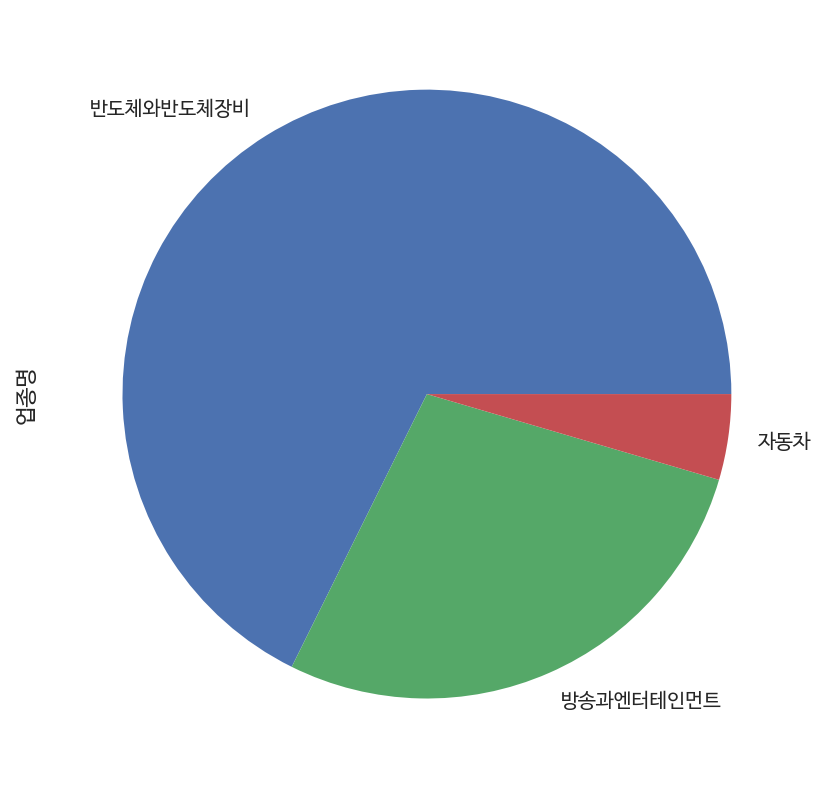

In [18]:
naver_raw['업종명'].value_counts(normalize=True).plot.pie(figsize=(7,7))

##### 파생변수 - 조회일자 생성
  * datetime을 이용 오늘일자 출력

In [21]:
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2022-09-19'

##### 조회일자 컬럼 생성  후 확인

In [25]:
naver_raw["조회일자"] = today
naver_raw.tail()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,조회일자
51,티와이홀딩스우,14200.0,800.0,-5.33%,14200.0,14550.0,2057.0,29.0,357.0,방송과엔터테인먼트,2022-09-19
52,위지윅스튜디오 *,21750.0,1250.0,-5.43%,21750.0,21800.0,240759.0,5317.0,220662.0,방송과엔터테인먼트,2022-09-19
53,에이스토리 *,22600.0,1300.0,-5.44%,22600.0,22650.0,110475.0,2517.0,125026.0,방송과엔터테인먼트,2022-09-19
54,초록뱀미디어 *,13800.0,800.0,-5.48%,13800.0,13850.0,96332.0,1351.0,35061.0,방송과엔터테인먼트,2022-09-19
55,스튜디오산타클로스 *,7360.0,480.0,-6.12%,7330.0,7360.0,80515.0,601.0,180358.0,방송과엔터테인먼트,2022-09-19


##### 거래량과 거래대금 시각화

##### 업종별 거래량 평균

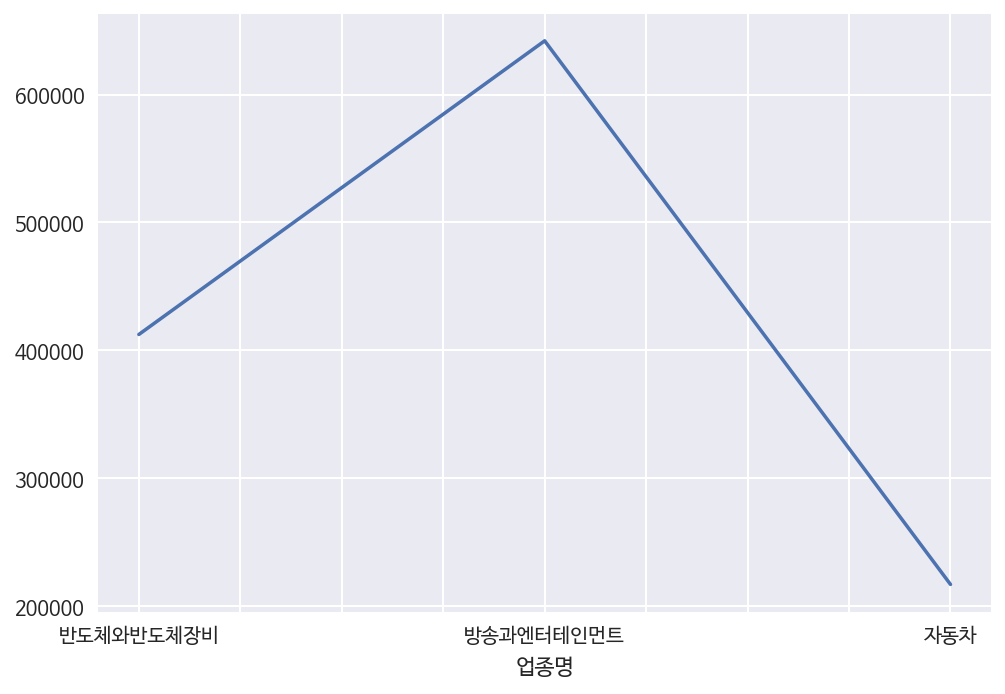

In [27]:
naver_raw.groupby(['업종명'])["거래량"].mean().plot()

<AxesSubplot:ylabel='종목명'>

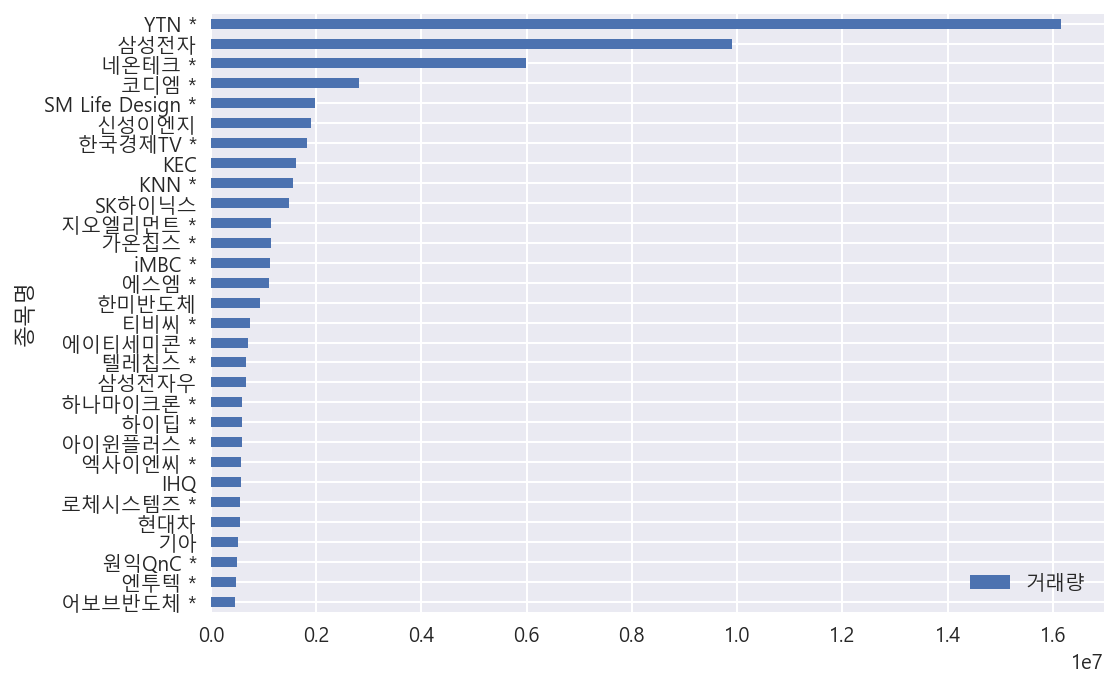

In [ ]:
# 거래량 상위 30개의 종목 bar chart
temp = naver_raw[["종목명", "거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

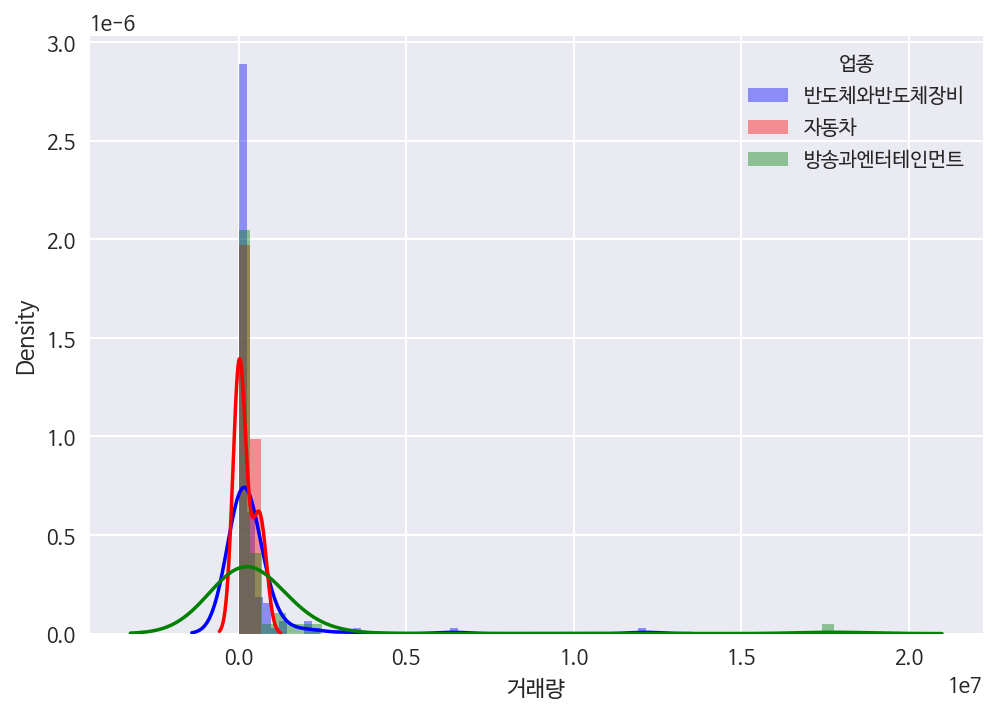

In [36]:
sns.distplot(naver_raw[naver_raw.업종명 == "반도체와반도체장비"]["거래량"],color="blue", label="반도체와반도체장비")
sns.distplot(naver_raw[naver_raw.업종명 == "자동차"]["거래량"],color="red", label="자동차")
sns.distplot(naver_raw[naver_raw.업종명 == "방송과엔터테인먼트"]["거래량"],color="green", label="방송과엔터테인먼트")
plt.legend(title="업종")
plt.show()


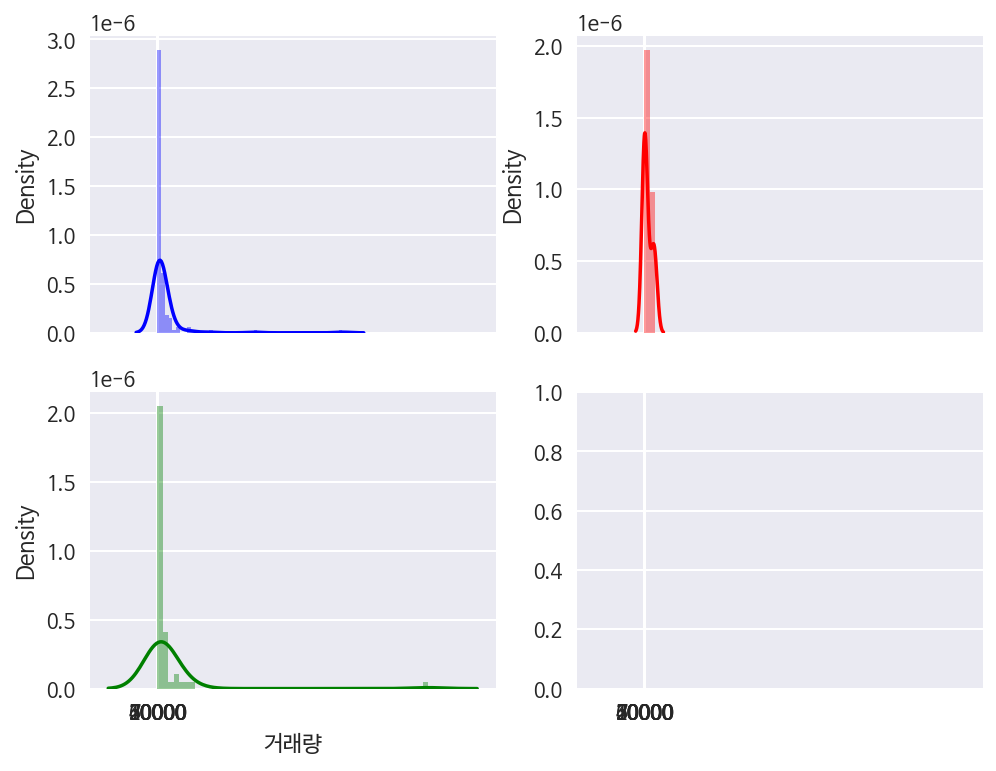

In [38]:
f, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)
sns.distplot(naver_raw[naver_raw.업종명 == "반도체와반도체장비"]["거래량"],color="blue", ax=axes[0, 0])
sns.distplot(naver_raw[naver_raw.업종명 == "자동차"]["거래량"],color="red", ax=axes[0, 1])
sns.distplot(naver_raw[naver_raw.업종명 == "방송과엔터테인먼트"]["거래량"],color="green", ax=axes[1,0])
plt.xticks(np.arange(0,80000,10000))
plt.show()

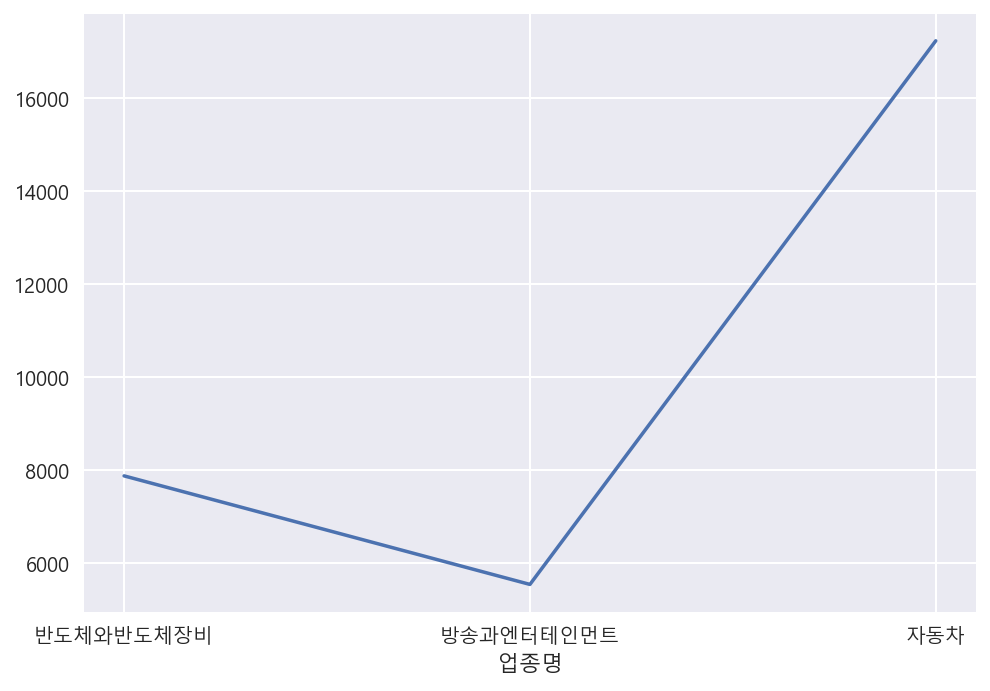

In [ ]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
naver_raw.groupby(["업종명"])["거래대금"].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

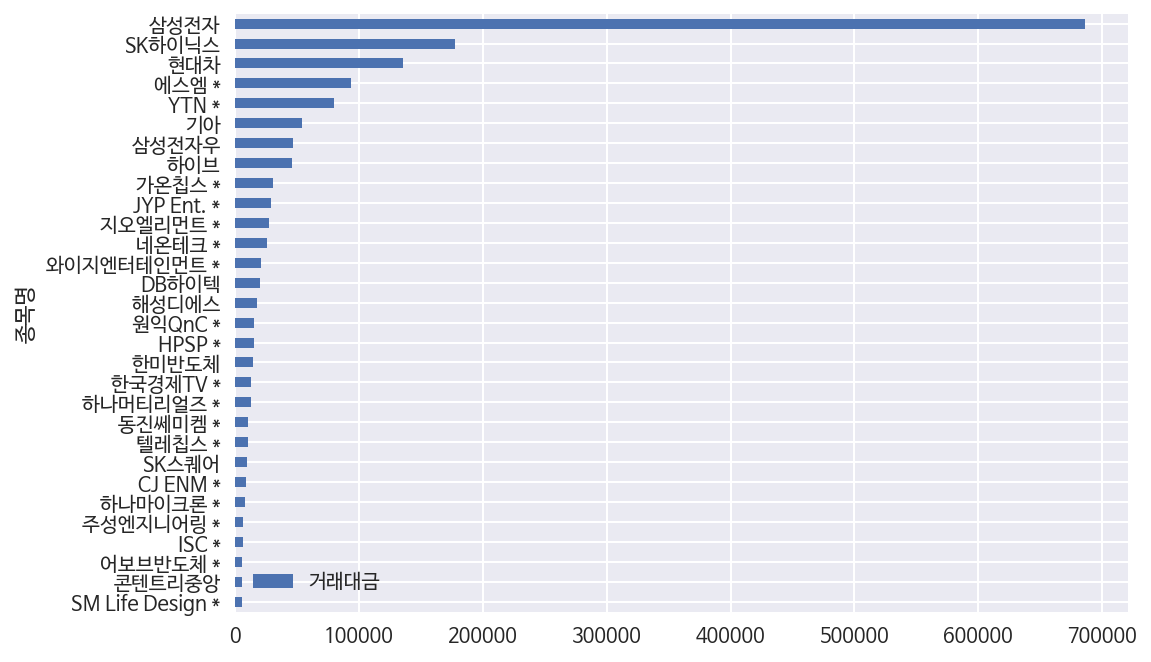

In [39]:
# 거래대금 상위 30개의 종목 bar chart
temp = naver_raw[["종목명", "거래대금"]].set_index("종목명")
temp = temp.sort_values("거래대금").tail(30)
temp.plot.barh()

#### 종목코드 병합
   * finance-datareader 라이브러리 이용하여 거래소별 전체 종목 코드와 가격 데이터 수집
   * 관련 자료 :https://financedata.github.io/posts/finance-data-reader-users-guide.html

##### finance-datareader설치

In [40]:
!pip --trusted-host pypi.org --trusted-host files.pythonhosted.org install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# 한국거래소 상장종목 전체 수집
import FinanceDataReader as fdr
krx = fdr.StockListing("KRX")
krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


##### 기존 네이버 데이터 종목명의 ' * '  제거한 종목명_전처리 컬럼생성
   - ex) 라온테크 * -> 라온테크

In [42]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
naver_raw["종목명_전처리"] = naver_raw["종목명"].str.replace("*", "")
naver_raw["종목명_전처리"] = naver_raw["종목명_전처리"].str.strip()

In [43]:
#전처리 확인
naver_raw[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,지오엘리먼트 *,지오엘리먼트
2,바른전자 *,바른전자
3,한미반도체,한미반도체
4,텔레칩스 *,텔레칩스
5,하나머티리얼즈 *,하나머티리얼즈


#####  종목코드 만들기
  * merge 이용
  * KRX데이터 중 Symbol, Name 만 사용
  * Symbol => 종목코드, Name => 종목명 로 변경

In [44]:
krx_data= krx[["Symbol", "Name"]]
krx_data.columns = ["종목코드", "종목명_전처리"]
krx_data.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [45]:
# 종목명 컬럼을 기준으로 krx_data 데이터프레임과 병합합니다.
df = naver_raw.merge(krx_data, on="종목명_전처리", how='left')
df.shape

(198, 13)

In [46]:
# 병합 확인
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,조회일자,종목명_전처리,종목코드
0,지오엘리먼트 *,21150.0,2250.0,+11.90%,21050.0,21150.0,1290478.0,27499.0,48162.0,반도체와반도체장비,2022-09-19,지오엘리먼트,311320
1,바른전자 *,4950.0,245.0,+5.21%,4950.0,4960.0,190871.0,925.0,40112.0,반도체와반도체장비,2022-09-19,바른전자,064520
2,한미반도체,13000.0,500.0,+4.00%,13000.0,13050.0,1135525.0,14746.0,340554.0,반도체와반도체장비,2022-09-19,한미반도체,042700
3,텔레칩스 *,14700.0,550.0,+3.89%,14700.0,14750.0,734311.0,10834.0,85245.0,반도체와반도체장비,2022-09-19,텔레칩스,054450
4,하나머티리얼즈 *,34750.0,1250.0,+3.73%,34700.0,34750.0,364704.0,12825.0,73659.0,반도체와반도체장비,2022-09-19,하나머티리얼즈,166090


In [47]:
#결측값 확인
df.isnull().sum()

종목명        0
현재가        0
전일비        0
등락률        0
매수호가       0
매도호가       0
거래량        0
거래대금       0
전일거래량      0
업종명        0
조회일자       0
종목명_전처리    0
종목코드       0
dtype: int64

#### 종목상세정보 수집
  - '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)','외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저','추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

##### 주가 정보 수집 함수 생성

In [48]:
# 데이터프레임 형태로  든 종목코드의 주가 정보를 추출합니다.
import time
def get_item_info(finance_code):
    finance_url = f"https://finance.naver.com/item/main.nhn?code={finance_code}"
    tables = pd.read_html(finance_url, encoding="cp949")
    # 수집한 정보를 item_info에 list 형태로 관리합니다.
    item_info = []
    # 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    # tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
    # 위에서 만든 item_info 에 리스트 형태로 추가합니다.
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
    # concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
    finance_df = pd.concat(item_info)
    #transpose를 통해 행과 열의 위치를 변경
    finance_df = finance_df.set_index(0).transpose()
    time.sleep(1)
    return finance_df

In [49]:
# 정상출력 확인
## 예시 : 현대차 005380
finance_code='005380'
get_item_info(finance_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.06),추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,344744.0,27263.0,22429.0,7.91,6.51,NaN,NaN,NaN,NaN,8161.0,...,61767198,28.91%,"4.00매수 l 265,556","220,000 l 162,000","8.94배 l 22,538원","6.00배 l 31,247원","0.64배 l 312,476원",2.48%,6.76배,-0.10%


##### tqdm
   * total quality data management의 약자 
   * 오래 걸리는 작업의 진행 상태를 표시합니다.
   * 참고 :https://tqdm.github.io/

In [50]:
from tqdm.auto import tqdm
tqdm.pandas()

In [51]:
# 위에서 수집한 종목코드값을 get_item_info 함수에 적용
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/198 [00:00<?, ?it/s]

In [52]:
result

0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0     매출액   영업이익 당기순이익  영업이익률 순이익률 ROE(지배주주) 부...
3      0    매출액  영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주) 부채비...
4      0    매출액   영업이익  당기순이익  영업이익률   순이익률 ROE(지배주주)...
                             ...                        
193    0    매출액  영업이익  당기순이익 영업이익률   순이익률 ROE(지배주주) 부...
194    0    매출액  영업이익 당기순이익  영업이익률   순이익률 ROE(지배주주) 부...
195    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
196    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
197    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 198, dtype: object

##### concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [53]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
result_df = pd.concat(result.tolist())
result_df = result_df.reset_index()
result_df["종목코드"] = df["종목코드"]
del result_df["index"]

In [54]:
result_df.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,동일업종 PER,동일업종 등락률,PERlEPS(2022.06),PBRlBPS (2022.06),배당수익률,PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09),종목코드
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.35배,+0.02%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311320
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.35배,+0.02%,"1,650.00배 l 3원","0.95배 l 5,217원",NaN,NaN,NaN,NaN,NaN,064520
2,1052.0,402.0,NaN,38.16,NaN,NaN,NaN,NaN,NaN,325.0,...,7.35배,+0.02%,"11.39배 l 1,141원","3.45배 l 3,764원",NaN,NaN,NaN,NaN,NaN,042700
3,427.0,34.0,32.0,7.96,7.49,NaN,NaN,NaN,NaN,231.0,...,7.35배,+0.02%,15.54배 l 946원,"1.58배 l 9,298원",NaN,NaN,NaN,NaN,NaN,054450
4,744.0,218.0,166.0,29.25,22.36,NaN,NaN,NaN,NaN,842.0,...,7.35배,+0.02%,"8.94배 l 3,885원","2.46배 l 14,104원",NaN,NaN,NaN,NaN,NaN,166090


In [55]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

(198, 13)

##### merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [56]:
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,조회일자,종목명_전처리,종목코드
0,지오엘리먼트 *,21150.0,2250.0,+11.90%,21050.0,21150.0,1290478.0,27499.0,48162.0,반도체와반도체장비,2022-09-19,지오엘리먼트,311320
1,바른전자 *,4950.0,245.0,+5.21%,4950.0,4960.0,190871.0,925.0,40112.0,반도체와반도체장비,2022-09-19,바른전자,064520
2,한미반도체,13000.0,500.0,+4.00%,13000.0,13050.0,1135525.0,14746.0,340554.0,반도체와반도체장비,2022-09-19,한미반도체,042700
3,텔레칩스 *,14700.0,550.0,+3.89%,14700.0,14750.0,734311.0,10834.0,85245.0,반도체와반도체장비,2022-09-19,텔레칩스,054450
4,하나머티리얼즈 *,34750.0,1250.0,+3.73%,34700.0,34750.0,364704.0,12825.0,73659.0,반도체와반도체장비,2022-09-19,하나머티리얼즈,166090


In [57]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(result_df)

In [58]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, result_df.shape, df_info.shape

((198, 13), (198, 39), (198, 51))

In [59]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,배당수익률l2021.12,동일업종 PER,동일업종 등락률,PERlEPS(2022.06),PBRlBPS (2022.06),배당수익률,PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09)
0,지오엘리먼트 *,21150.0,2250.0,+11.90%,21050.0,21150.0,1290478.0,27499.0,48162.0,반도체와반도체장비,...,0.47%,7.35배,+0.02%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,바른전자 *,4950.0,245.0,+5.21%,4950.0,4960.0,190871.0,925.0,40112.0,반도체와반도체장비,...,NaN,7.35배,+0.02%,"1,650.00배 l 3원","0.95배 l 5,217원",NaN,NaN,NaN,NaN,NaN
2,한미반도체,13000.0,500.0,+4.00%,13000.0,13050.0,1135525.0,14746.0,340554.0,반도체와반도체장비,...,2.31%,7.35배,+0.02%,"11.39배 l 1,141원","3.45배 l 3,764원",NaN,NaN,NaN,NaN,NaN
3,텔레칩스 *,14700.0,550.0,+3.89%,14700.0,14750.0,734311.0,10834.0,85245.0,반도체와반도체장비,...,0.82%,7.35배,+0.02%,15.54배 l 946원,"1.58배 l 9,298원",NaN,NaN,NaN,NaN,NaN
4,하나머티리얼즈 *,34750.0,1250.0,+3.73%,34700.0,34750.0,364704.0,12825.0,73659.0,반도체와반도체장비,...,1.73%,7.35배,+0.02%,"8.94배 l 3,885원","2.46배 l 14,104원",NaN,NaN,NaN,NaN,NaN


#### 파일 만들기

In [62]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# file_name
file_name = f"{file_name}_{today}.csv"
file_name

'285_2022-09-19.csv_2022-09-19.csv'

In [63]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [64]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,배당수익률l2021.12,동일업종 PER,동일업종 등락률,PERlEPS(2022.06),PBRlBPS (2022.06),배당수익률,PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09)
0,지오엘리먼트 *,21150.0,2250.0,+11.90%,21050.0,21150.0,1290478.0,27499.0,48162.0,반도체와반도체장비,...,0.47%,7.35배,+0.02%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,바른전자 *,4950.0,245.0,+5.21%,4950.0,4960.0,190871.0,925.0,40112.0,반도체와반도체장비,...,NaN,7.35배,+0.02%,"1,650.00배 l 3원","0.95배 l 5,217원",NaN,NaN,NaN,NaN,NaN
2,한미반도체,13000.0,500.0,+4.00%,13000.0,13050.0,1135525.0,14746.0,340554.0,반도체와반도체장비,...,2.31%,7.35배,+0.02%,"11.39배 l 1,141원","3.45배 l 3,764원",NaN,NaN,NaN,NaN,NaN
3,텔레칩스 *,14700.0,550.0,+3.89%,14700.0,14750.0,734311.0,10834.0,85245.0,반도체와반도체장비,...,0.82%,7.35배,+0.02%,15.54배 l 946원,"1.58배 l 9,298원",NaN,NaN,NaN,NaN,NaN
4,하나머티리얼즈 *,34750.0,1250.0,+3.73%,34700.0,34750.0,364704.0,12825.0,73659.0,반도체와반도체장비,...,1.73%,7.35배,+0.02%,"8.94배 l 3,885원","2.46배 l 14,104원",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,티와이홀딩스우,14200.0,800.0,-5.33%,14200.0,14550.0,2057.0,29.0,357.0,방송과엔터테인먼트,...,NaN,32.33배,-1.15%,"5.77배 l 2,461원","0.36배 l 39,323원",NaN,NaN,NaN,NaN,NaN
194,위지윅스튜디오 *,21750.0,1250.0,-5.43%,21750.0,21800.0,240759.0,5317.0,220662.0,방송과엔터테인먼트,...,NaN,32.33배,-1.15%,N/A l -483원,"5.26배 l 4,133원",NaN,NaN,NaN,NaN,NaN
195,에이스토리 *,22600.0,1300.0,-5.44%,22600.0,22650.0,110475.0,2517.0,125026.0,방송과엔터테인먼트,...,NaN,32.33배,-1.15%,"17.19배 l 1,315원","3.45배 l 6,543원",NaN,NaN,NaN,NaN,NaN
196,초록뱀미디어 *,13800.0,800.0,-5.48%,13800.0,13850.0,96332.0,1351.0,35061.0,방송과엔터테인먼트,...,NaN,32.33배,-1.15%,N/A l -46원,"1.16배 l 11,903원",NaN,NaN,NaN,NaN,NaN
